In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import brewer2mpl
%matplotlib inline

In [2]:
bmap = brewer2mpl.get_map("Set1", "qualitative", 7)                                                                                                                                                                                                                                                                          
colors = bmap.colors
Lcolors = colors[0:5]

for i in range(5):
    color = [i/255. for i in Lcolors[i]]
    Lcolors[i] = color

plt.rcParams['xtick.labelsize']= 17
plt.rcParams['ytick.labelsize']= 17
plt.rcParams["figure.figsize"] = (10,5)

In [3]:
gmsc_prediction_mean = [0.687, 0.783, 0.834, 0.9, 0.931, 0.951, 0.965]
gmsc_prediction_std = [0.113, 0.103, 0.074, 0.035, 0.018, 0.01, 0.007]
gmsc_pre_coreset_mean = [0.711, 0.755, 0.808, 0.807, 0.888, 0.933, 0.962]
gmsc_pre_coreset_std = [0.133, 0.118, 0.066, 0.071, 0.034, 0.017, 0.011]
gmsc_model_ext_mean = [0.89, 0.91, 0.932, 0.945, 0.957, 0.963, 0.972]
gmsc_model_ext_std = [0.028, 0.023, 0.017, 0.013, 0.009, 0.008, 0.005]
gmsc_doublecf_mean = [0.91, 0.924, 0.939, 0.945, 0.946, 0.948, 0.963]
gmsc_doublecf_std = [0.03, 0.02, 0.017, 0.017, 0.014, 0.014, 0.007]
gmsc_doublecfx_mean = [0.918, 0.927, 0.934, 0.946, 0.956, 0.96, 0.965]
gmsc_doublecfx_std = [0.02, 0.018, 0.018, 0.014, 0.012, 0.008, 0.007]
gmsc_xaxis = [5, 10, 20, 40, 80, 160, 320]

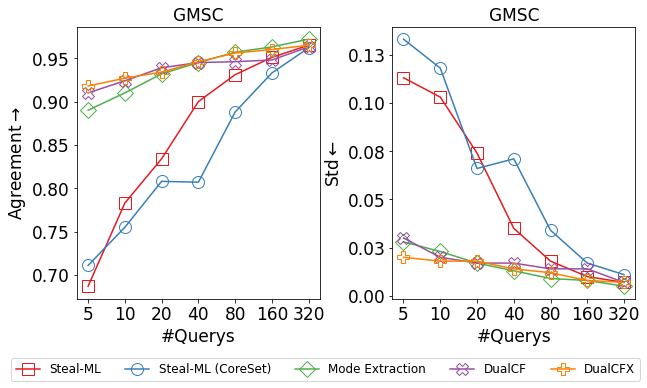

In [10]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(1, 2)#, sharex=True, sharey = True)
xtick = np.arange(7)
    
# plot the [2, 0] GMSC

axs[0].plot(xtick, gmsc_prediction_mean, color = Lcolors[0], marker = "s", label = "Steal-ML", markerfacecolor = 'none', markersize = 12)
axs[0].plot(xtick, gmsc_pre_coreset_mean, color = Lcolors[1], marker = "o", label = "Steal-ML (CoreSet)", markerfacecolor = 'none', markersize = 12)
axs[0].plot(xtick, gmsc_model_ext_mean, color = Lcolors[2], marker = "D", label = "Mode Extraction", markerfacecolor = 'none', markersize = 12)
axs[0].plot(xtick, gmsc_doublecf_mean, color = Lcolors[3], marker = "X", label = "DualCF", markerfacecolor = 'none', markersize = 12)
axs[0].plot(xtick, gmsc_doublecfx_mean, color = Lcolors[4], marker = "P", label = "DualCFX", markerfacecolor = 'none', markersize = 12)

 
# plot [2, 1] STD
axs[1].plot(xtick, gmsc_prediction_std, color = Lcolors[0], marker = "s", markerfacecolor = 'none', markersize = 12)
axs[1].plot(xtick, gmsc_pre_coreset_std, color = Lcolors[1], marker = "o", markerfacecolor = 'none', markersize = 12)
axs[1].plot(xtick, gmsc_model_ext_std, color = Lcolors[2], marker = "D", markerfacecolor = 'none', markersize = 12)
axs[1].plot(xtick, gmsc_doublecf_std, color = Lcolors[3], marker = "X", markerfacecolor = 'none', markersize = 12)
axs[1].plot(xtick, gmsc_doublecfx_std, color = Lcolors[4], marker = "P", markerfacecolor = 'none', markersize = 12)

axs[0].set_ylabel(r'Agreement$\rightarrow$', fontsize = 17)
axs[1].set_ylabel(r'Std$\leftarrow$', fontsize = 17)
axs[0].set_title(r"GMSC", fontsize = 17)
axs[1].set_title(r"GMSC", fontsize = 17)

axs[0].set_xticks(xtick)
axs[0].set_xticklabels(gmsc_xaxis)
axs[1].set_xticks(xtick)
axs[1].set_xticklabels(gmsc_xaxis)


axs[0].set_xlabel("#Querys", fontsize = 17)
axs[1].set_xlabel("#Querys", fontsize = 17)
#axs[2, 2].tick_params(axis = 'y', which = 'major', labelsize = 12)
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 5, fontsize = 12, columnspacing = 2, bbox_to_anchor = (0.47, -0.12))
plt.subplots_adjust(wspace = 0.3)
plt.savefig("imbalanced.pdf", dpi = 600, bbox_inches = 'tight')
plt.show()